# Practice Project - 4
Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
#url = https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [68]:
#Note: File is saved on my local computer(kindly consider)
source = pd.read_csv(r"C:\Users\Administrator\Desktop\abalone.csv")
df = source

In [69]:
#print(source.head())
#print(source.sample())
print(source.shape)

(4177, 9)


In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Datatypes contain categorical data, therefore LabelEncoder will be used to encode the Sex column

In [5]:
df = pd.DataFrame(data=source)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

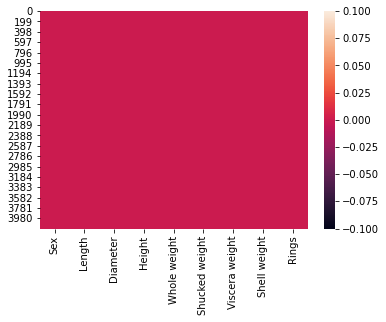

In [7]:
sns.heatmap(df.isnull())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


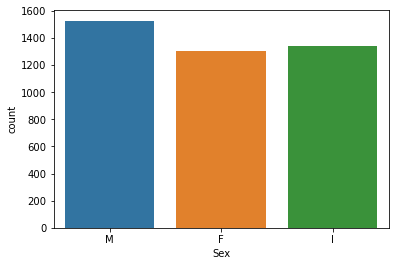

In [8]:
ax = sns.countplot(x='Sex', data=df)
print(df['Sex'].value_counts())

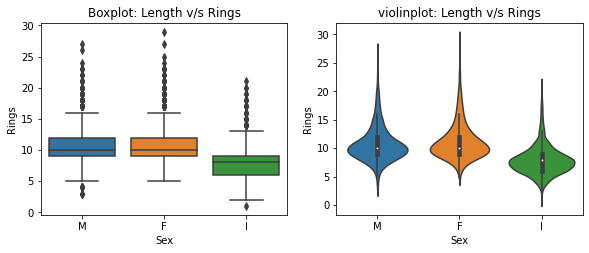

In [9]:
plt.figure(1, figsize=(15,12))
plt.subplot(331)
sns.boxplot(x=df['Sex'], y=df['Rings'], data=df).set_title('Boxplot: Length v/s Rings')

plt.subplot(332)
sns.violinplot(x=df['Sex'], y=df['Rings'], data=df).set_title('violinplot: Length v/s Rings')
plt.show()

# Distribution Plots

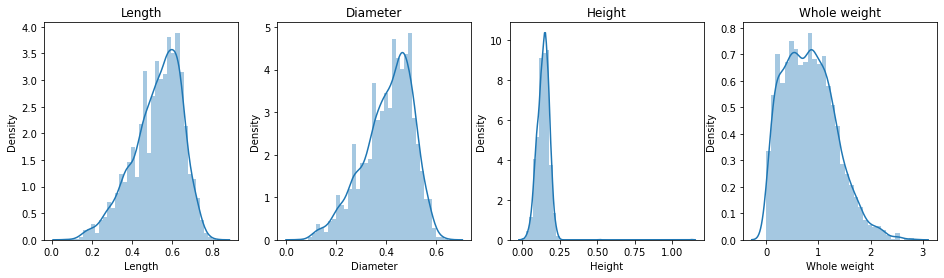

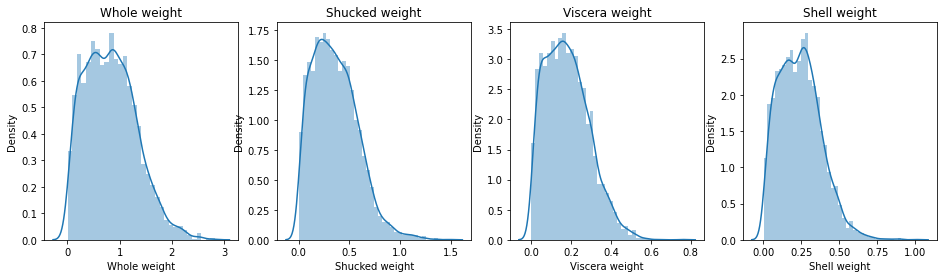

In [10]:
plt.figure(2, figsize=(16,4))

plt.subplot(141)
sns.distplot(df['Length']).set_title('Length')

plt.subplot(142)
sns.distplot(df['Diameter']).set_title('Diameter')

plt.subplot(143)
sns.distplot(df['Height']).set_title('Height')

plt.subplot(144)
sns.distplot(df['Whole weight']).set_title('Whole weight')
plt.show()
#-------------------------------------------------------------------
plt.figure(3, figsize=(16,4))

plt.subplot(141)
sns.distplot(df['Whole weight']).set_title('Whole weight')

plt.subplot(142)
sns.distplot(df['Shucked weight']).set_title('Shucked weight')

plt.subplot(143)
sns.distplot(df['Viscera weight']).set_title('Viscera weight')

plt.subplot(144)
sns.distplot(df['Shell weight']).set_title('Shell weight')
plt.show()

### These Distribution plot show that there is skewness present in the data

Text(0.5, 1.0, 'Rings')

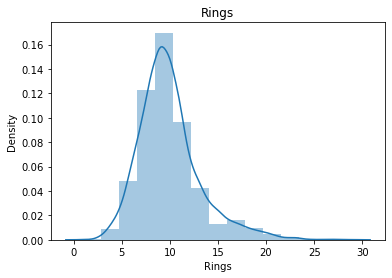

In [11]:
sns.distplot(df['Rings'], bins=15).set_title('Rings')

# pairplot

In [12]:
#sns.pairplot(df, vars=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
      # 'Viscera weight', 'Shell weight', 'Rings'], kind='scatter', diag_kind = 'kde')

In [13]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [14]:
lencode = LabelEncoder()
df['Sex'] = lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [16]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [17]:
df['Height'] = np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

df=np.sqrt(df)
df.skew()

In [18]:
from scipy.stats import zscore
dfzscore = np.abs(zscore(df))
print(np.where(dfzscore > 3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [19]:
dfnew = df[(dfzscore<3).all(axis=1)]
print('dfnew.shape = ', dfnew.shape)

df = dfnew

dfnew.shape =  (4019, 9)


In [20]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

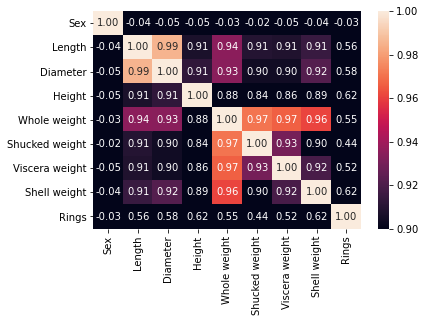

In [21]:
sns.heatmap(df.corr(), annot=True, vmin=0.9, vmax=1, fmt='0.2f')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
x = df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [24]:
x.shape

(4019, 8)

In [25]:
x.shape[0]

4019

In [26]:
y = df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [27]:
def vif_calc():
    vif = pd.DataFrame()
    vif["VIF FACTOR"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_calc()

   VIF FACTOR        features
0    2.632493             Sex
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


In [28]:
df.drop(['Length','Shucked weight'], axis=1, inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [29]:
x = df.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [30]:
x.shape

(4019, 6)

In [31]:
vif_calc()

   VIF FACTOR        features
0    2.623184             Sex
1  207.507326        Diameter
2  131.432133          Height
3  140.572357    Whole weight
4   60.762342  Viscera weight
5   58.911776    Shell weight


<AxesSubplot:>

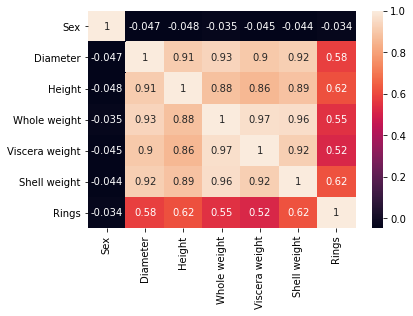

In [32]:
sns.heatmap(df.corr(), annot=True)

In [33]:
x.shape

(4019, 6)

In [34]:
y.shape

(4019,)

In [35]:
scale = StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

# MODEL BUILDING

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=55)

In [37]:
xtrain.shape

(2813, 6)

In [38]:
ytrain.shape

(2813,)

In [39]:
xtest.shape

(1206, 6)

In [40]:
ytest.shape

(1206,)

In [41]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.coef_

array([ 0.00840657,  0.36149019,  1.02282032, -2.76538666,  0.13076611,
        3.07787733])

In [42]:
df.columns

Index(['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight',
       'Shell weight', 'Rings'],
      dtype='object')

In [43]:
features = ['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight', 'Shell weight']

In [44]:
list(zip(lr.coef_,features))

[(0.008406569042269203, 'Sex'),
 (0.3614901886399504, 'Diameter'),
 (1.0228203212380835, 'Height'),
 (-2.765386661105306, 'Whole weight'),
 (0.1307661112267638, 'Viscera weight'),
 (3.0778773281253806, 'Shell weight')]

In [45]:
cfdf = pd.DataFrame(data=lr.coef_, index = features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [46]:
lr.intercept_

9.780269356675209

In [47]:
lr.score(xtrain,ytrain)

0.46367716121560787

In [48]:
pred = lr.predict(xtest)
pred

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [49]:
print("Predicted values are: ", pred)

Predicted values are:  [12.11331063 11.61504384  9.61650377 ... 10.38679789  9.70195901
 10.88035602]


In [50]:
preddf = pd.DataFrame(pred)
preddf

,0
0,12.113311
1,11.615044
2,9.616504
3,10.017946
4,10.587250
...,...
1201,5.959364
1202,11.950754
1203,10.386798
1204,9.701959


In [51]:
lr.score(xtest,ytest)

0.42899509023721416

In [52]:
print("Mean absolute error: ", mean_absolute_error(ytest, pred))
print("Mean squared error: ", mean_squared_error(ytest, pred))
print("Mean absolute error: ",np.sqrt(mean_squared_error(ytest, pred)))
print('R2 score: ', r2_score(ytest, pred))

Mean absolute error:  1.5985286611387988
Mean squared error:  4.538196137382711
Mean absolute error:  2.130304235874001
R2 score:  0.42899509023721416


# Regularization

In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

rdg = Ridge(alpha=0.0001, random_state=45)
rdg.fit(xtrain, ytrain)
rdg.score(xtrain, ytrain)

0.4636771612155063

In [54]:
rdg.coef_

array([ 0.00840652,  0.36148979,  1.02282057, -2.76538155,  0.13076408,
        3.07787431])

In [55]:
cfdf = pd.DataFrame(lr.coef_, features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [56]:
predict = rdg.predict(xtest)
predict

array([12.11331007, 11.61504259,  9.61650362, ..., 10.38679809,
        9.70196011, 10.88035501])

In [57]:
r2_score(ytest,predict)

0.4289951284032698

In [58]:
lso = Lasso(alpha=0.0001, random_state=47)
lso.fit(xtrain, ytrain)
lso.score(xtrain, ytrain)

0.46367698288314974

In [59]:
predictlso = lso.predict(xtest)
predictlso

array([12.11283243, 11.61287444,  9.61572211, ..., 10.38686793,
        9.70287631, 10.87837252])

In [60]:
r2_score(ytest,predictlso)

0.42904342571409815

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [62]:
dtr = DecisionTreeRegressor(criterion = 'mse')
dtr.fit(xtrain, ytrain)
print('dtr score: ', dtr.score(xtrain, ytrain))
dtrpredict = dtr.predict(xtest)
print('dtr r2_score: ', r2_score(ytest,dtrpredict))
print("Mean squared error of dtr = ", mean_squared_error(ytest, dtrpredict))
print("Root Mean squared error of dtr = ", np.sqrt(mean_squared_error(ytest, dtrpredict)))

dtr score:  1.0
dtr r2_score:  0.035573334528312794
Mean squared error of dtr =  7.6650082918739635
Root Mean squared error of dtr =  2.768575137480282


In [63]:
knr = KNeighborsRegressor()
knr.fit(xtrain, ytrain)
print('knr score: ', knr.score(xtrain, ytrain))
knrpredict = knr.predict(xtest)
print('knr r2_score: ', r2_score(ytest,knrpredict))
print("Mean squared error of knr = ", mean_squared_error(ytest, knrpredict))
print("Root Mean squared error of knr = ", np.sqrt(mean_squared_error(ytest, knrpredict)))

knr score:  0.6336510927605445
knr r2_score:  0.3851706976606979
Mean squared error of knr =  4.886500829187396
Root Mean squared error of knr =  2.2105431072900155


In [64]:
svr = SVR()
svr.fit(xtrain, ytrain)
print('svc score: ', svr.score(xtrain, ytrain))
svrpredict = svr.predict(xtest)
print('svr r2_score: ', r2_score(ytest,svrpredict))
print("Mean squared error of svr = ", mean_squared_error(ytest, svrpredict))
print("Root Mean squared error of svr = ", np.sqrt(mean_squared_error(ytest, svrpredict)))

svc score:  0.4944271700751568
svr r2_score:  0.4699932167972435
Mean squared error of svr =  4.212353861049312
Root Mean squared error of svr =  2.0524019735542334


------------------END------------------